In [ ]:
import json
from pandas.io.json import json_normalize
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
input_file = open(data_path + 'Data/' + 'df_SpecificFeature.json', 'r') #資料位置
data = json.load(input_file)
df = json_normalize(data) #json -> dataframe
df.head(2)

#資料集準備

In [ ]:
df['Board'].value_counts()

Sad          25791
happy        24699
Gossiping    21503
prozac       20280
Name: Board, dtype: int64

In [ ]:
df['Depressive'].value_counts()

0    71993
1    20280
Name: Depressive, dtype: int64

In [ ]:
df['Emotion'].value_counts()

0.0    34650
1.0    27609
Name: Emotion, dtype: int64

In [ ]:
df[df['Emotion'].isna()==True]['Depressive'].value_counts()

0    21503
1     8511
Name: Depressive, dtype: int64

In [ ]:
pd.crosstab(index=df['Emotion'], columns=df["Depressive"], margins=True)

Depressive,0,1,All
Emotion,,,
0.0,25791,8859,34650
1.0,24699,2910,27609
All,50490,11769,62259


In [ ]:
df_NDepressive = df[df['Depressive']==0]
len(df_NDepressive)

71993

In [ ]:
df_Depressive = df[df['Depressive']==1]
len(df_Depressive)

20280

In [ ]:
#因樣本數差異過大，因此將非憂鬱組進行抽樣，使樣本數相等。
df_NDepressive = df[df['Depressive']==0].sample(n=len(df[df['Depressive']==1]), random_state=0)
len(df_NDepressive)

20280

In [ ]:
df_Depressive = df[df['Depressive']==1]
len(df_Depressive)

20280

In [ ]:
df = pd.concat([df_NDepressive, df_Depressive])
len(df)

40560

#人稱代名詞

In [ ]:
POScol=['I', 'you', 'he', 'we', 'yous', 'they']

In [ ]:
df_NDepressive.describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .995]). \
              drop(['Depressive', 'Emotion', 'Format_Time', 'Hour', 'Week', 'Season'], axis=1)

,I,you,he,we,yous,they,Hour_4range,Month
count,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000
mean,3.042110,1.256164,0.463757,0.172387,0.068984,0.076430,2.943146,7.198422
std,6.963658,4.114589,2.076492,0.749816,0.514041,0.484868,1.058975,3.139503
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000
75%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000
80%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,10.000000
85%,5.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.000000,11.000000
90%,8.000000,4.000000,1.000000,0.000000,0.000000,0.000000,4.000000,11.000000


In [ ]:
df_Depressive.describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .995]). \
              drop(['Depressive', 'Emotion', 'Format_Time', 'Hour', 'Week', 'Season', 'Hour_4range', 'Month'], axis=1)

,I,you,he,we,yous,they
count,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000,20280.000000
mean,7.900641,1.040927,1.479290,0.210256,0.087377,0.233728
std,11.113682,3.331023,4.386912,0.872103,0.547699,0.913707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000
80%,12.000000,1.000000,2.000000,0.000000,0.000000,0.000000
85%,15.000000,2.000000,3.000000,0.000000,0.000000,0.000000
90%,19.000000,3.000000,4.000000,1.000000,0.000000,1.000000


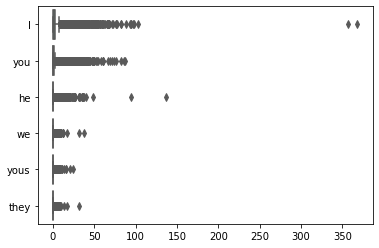

In [ ]:
sns.boxplot(data=df_NDepressive[POScol], orient="h", palette="Set2")

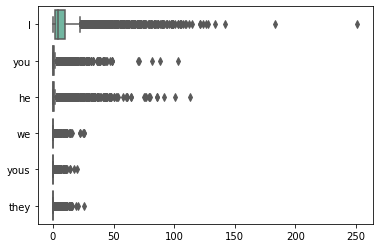

In [ ]:
sns.boxplot(data=df_Depressive[POScol], orient="h", palette="Set2")

In [ ]:
!pip install Pingouin

     |████████████████████████████████| 182 kB 4.2 MB/s 
     |████████████████████████████████| 38.2 MB 22 kB/s 
     |████████████████████████████████| 9.8 MB 22.0 MB/s 
  Created wheel for Pingouin: filename=pingouin-0.5.0-py3-none-any.whl size=193661 sha256=cb0f8ae410316602f8e6a0234cf78bcaba4742960a6406b1bf2d725e9baedb81
  Stored in directory: /root/.cache/pip/wheels/14/46/f9/cedd81d68d2515c24bbbd000d5b347e4fe092ccc4b568f7f70
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=28ee3b993071eedc47386a1e3d760410dc215a3073296c3319cbbdecb1e3bd71
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built Pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmo

In [ ]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

--2021-11-15 15:20:19--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 108.177.125.101, 108.177.125.113, 108.177.125.138, ...
Connecting to drive.google.com (drive.google.com)|108.177.125.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2jdumofkckupamj8j023ll95tq988742/1636989600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-11-15 15:20:22--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2jdumofkckupamj8j023ll95tq988742/1636989600000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.125.132, 2404:6800:4008:c01::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

In [ ]:
!pip install researchpy

In [ ]:
import math
import pingouin as pg
from scipy import stats
import researchpy as ry
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.style.use('seaborn')
myfont=FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

In [ ]:
def stat(myname, mylabel):

  #刪除極端值:z分數超過3個標準差
  df_ND=df_NDepressive[(np.abs(stats.zscore(df_NDepressive[myname]))<3)]
  df_D=df_Depressive[(np.abs(stats.zscore(df_Depressive[myname]))<3)]
  df_temp=pd.concat([df_ND, df_D])

  print('----描述統計----')
  print('無憂鬱傾向')
  print(df_ND[myname].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .995]))
  print('\n')
  #print(df_ND[myname].value_counts(bins=[-1, 0, df_ND[myname].quantile(.95), df_ND[myname].max()]).sort_index())
  print('有憂鬱傾向')
  print(df_D[myname].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .995]))
  #print(df_D[myname].value_counts(bins=[-1, 0, df_D[myname].quantile(.95), df_D[myname].max()]).sort_index())
  print('\n')

  print('----統計結果----')
  print(mylabel)
  alpha = 0.05

  #check for equal variances
  stat, p = stats.levene(df_ND[myname], df_D[myname])
  print('Levene\'s F=%.2f, p=%.3f' % (stat, p))
  if p < alpha:
    flag=False
    print('variances is not equal.')
  else:
    flag=True
    print('variances is equal.')
  
  #t-test
  stat, p = stats.ttest_ind(df_ND[myname], df_D[myname], equal_var=flag)
  if flag==True:
    dof=df_ND[myname].count()+df_D[myname].count()-2
  else:
    dof=(df_ND.var()[myname]/df_ND[myname].count() + df_D.var()[myname]/df_D[myname].count())**2 / ((df_ND.var()[myname]/df_ND[myname].count())**2 / (df_ND[myname].count()-1) + (df_D.var()[myname]/df_D[myname].count())**2 / (df_D[myname].count()-1))
  
  print('\nStatistics=%.2f, p=%.3f, dof=%d' % (stat, p, dof))

  # interpret
  if p > alpha:
    print('Same distributions (fail to reject H0)')
  else:
    print('Different distributions (reject H0)')
  
  #cohen'd
  d=pg.compute_effsize(df_ND[myname], df_D[myname], eftype='cohen')
  print('cohen\'d=%.2f\n' %d)

  des, res=ry.ttest(df_ND[myname], df_D[myname], equal_variances=flag)
  print(res)
  print('\n')

  print('----圖表----')
  fig, ax=plt.subplots(1, 1)
  fig.suptitle(mylabel, fontproperties=myfont)
  sns.boxplot(x='Depressive', y=myname, data=df_temp, palette="Set3")
  ax.set_xticklabels(labels=['無憂鬱傾向', '有憂鬱傾向'], fontproperties=myfont)
  ax.set(xlabel=None, ylabel=None)

----描述統計----
無憂鬱傾向
count    19964.000000
mean         2.464135
std          3.692247
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
80%          4.000000
85%          5.000000
90%          7.000000
95%         10.000000
99%         18.000000
99.5%       20.000000
max         23.000000
Name: I, dtype: float64


有憂鬱傾向
count    19859.000000
mean         6.794652
std          7.584269
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
80%         11.000000
85%         14.000000
90%         17.000000
95%         23.000000
99%         35.000000
99.5%       38.000000
max         41.000000
Name: I, dtype: float64


----統計結果----
第一人稱單數代名詞
Levene's F=3386.74, p=0.000
variances is not equal.

Statistics=-72.38, p=0.000, dof=28736
Different distributions (reject H0)
cohen'd=-0.73

              Welch's t-test     results
0      Difference (I - I) =      -4.3305
1      Degrees of freedom =   28737.1399
2                  

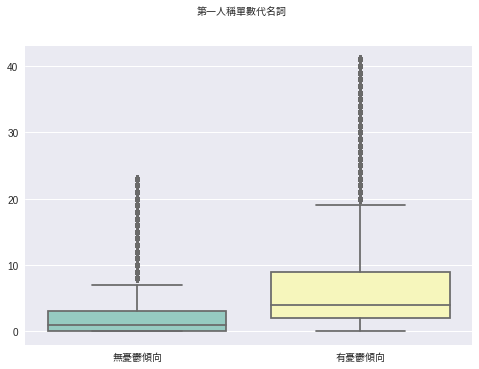

In [ ]:
stat('I', '第一人稱單數代名詞')

----描述統計----
無憂鬱傾向
count    19901.000000
mean         0.820210
std          2.044292
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          1.000000
85%          2.000000
90%          3.000000
95%          5.000000
99%         10.000000
99.5%       12.000000
max         13.000000
Name: you, dtype: float64


有憂鬱傾向
count    19933.000000
mean         0.713490
std          1.689806
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
80%          1.000000
85%          2.000000
90%          2.000000
95%          4.000000
99%          8.000000
99.5%       10.000000
max         11.000000
Name: you, dtype: float64


----統計結果----
第二人稱單數代名詞
Levene's F=32.25, p=0.000
variances is not equal.

Statistics=5.68, p=0.000, dof=38447
Different distributions (reject H0)
cohen'd=0.06

              Welch's t-test     results
0  Difference (you - you) =       0.1067
1      Degrees of freedom =   38449.5974
2                   

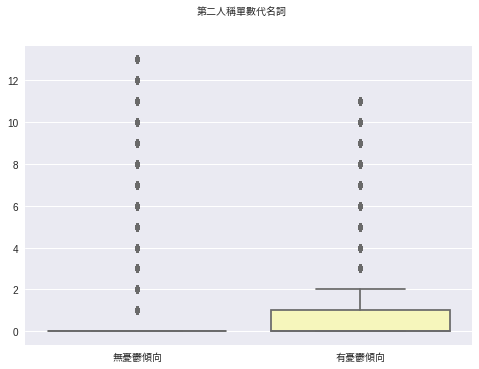

In [ ]:
stat('you', '第二人稱單數代名詞')

----描述統計----
無憂鬱傾向
count    20069.000000
mean         0.323384
std          0.871596
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          1.000000
90%          1.000000
95%          2.000000
99%          5.000000
99.5%        5.000000
max          6.000000
Name: he, dtype: float64


有憂鬱傾向
count    19918.000000
mean         1.038106
std          2.197280
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
80%          1.000000
85%          2.000000
90%          3.000000
95%          6.000000
99%         11.000000
99.5%       13.000000
max         14.000000
Name: he, dtype: float64


----統計結果----
第三人稱單數代名詞
Levene's F=1832.81, p=0.000
variances is not equal.

Statistics=-42.69, p=0.000, dof=25994
Different distributions (reject H0)
cohen'd=-0.43

              Welch's t-test     results
0    Difference (he - he) =      -0.7147
1      Degrees of freedom =   25994.7871
2                

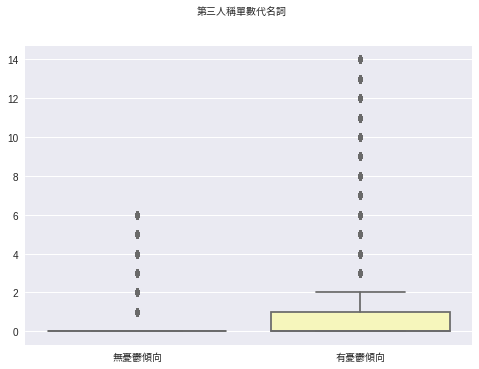

In [ ]:
stat('he', '第三人稱單數代名詞')

----描述統計----
無憂鬱傾向
count    19926.000000
mean         0.100622
std          0.357831
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          1.000000
99%          2.000000
99.5%        2.000000
max          2.000000
Name: we, dtype: float64


有憂鬱傾向
count    19875.000000
mean         0.117233
std          0.384282
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          1.000000
99%          2.000000
99.5%        2.000000
max          2.000000
Name: we, dtype: float64


----統計結果----
第一人稱複數代名詞
Levene's F=19.92, p=0.000
variances is not equal.

Statistics=-4.46, p=0.000, dof=39583
Different distributions (reject H0)
cohen'd=-0.04

              Welch's t-test     results
0    Difference (we - we) =      -0.0166
1      Degrees of freedom =   39585.6654
2                   

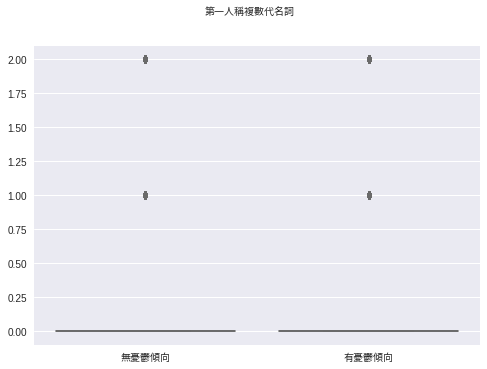

In [ ]:
stat('we', '第一人稱複數代名詞')

----描述統計----
無憂鬱傾向
count    20003.000000
mean         0.023946
std          0.152886
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
99.5%        1.000000
max          1.000000
Name: yous, dtype: float64


有憂鬱傾向
count    19950.000000
mean         0.033283
std          0.179380
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          0.000000
99%          1.000000
99.5%        1.000000
max          1.000000
Name: yous, dtype: float64


----統計結果----
第二人稱複數代名詞
Levene's F=31.36, p=0.000
variances is not equal.

Statistics=-5.60, p=0.000, dof=38940
Different distributions (reject H0)
cohen'd=-0.06

                Welch's t-test     results
0  Difference (yous - yous) =      -0.0093
1        Degrees of freedom =   38942.4632
2         

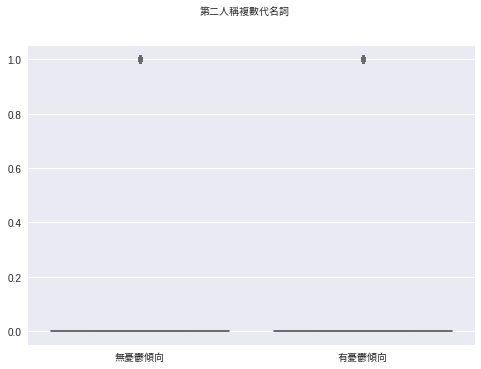

In [ ]:
stat('yous', '第二人稱複數代名詞')

----描述統計----
無憂鬱傾向
count    19994.00000
mean         0.03471
std          0.18305
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
80%          0.00000
85%          0.00000
90%          0.00000
95%          0.00000
99%          1.00000
99.5%        1.00000
max          1.00000
Name: they, dtype: float64


有憂鬱傾向
count    19774.000000
mean         0.120866
std          0.397046
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          1.000000
99%          2.000000
99.5%        2.000000
max          2.000000
Name: they, dtype: float64


----統計結果----
第三人稱複數代名詞
Levene's F=774.88, p=0.000
variances is not equal.

Statistics=-27.74, p=0.000, dof=27747
Different distributions (reject H0)
cohen'd=-0.28

                Welch's t-test     results
0  Difference (they - they) =      -0.0862
1        Degrees of freedom =   27747.8691
2                     

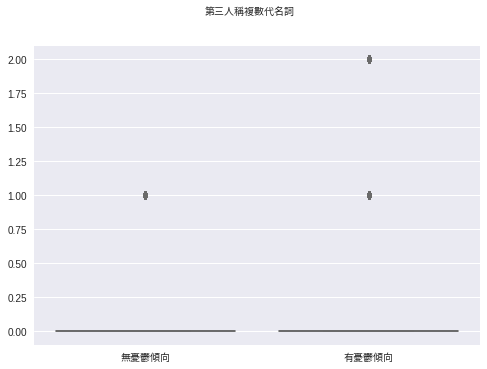

In [ ]:
stat('they', '第三人稱複數代名詞')

#時間

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('seaborn')

In [ ]:
df['Depressive'].value_counts()

1    20280
0    20280
Name: Depressive, dtype: int64

In [ ]:
def Stat_Time(myname, mylabel=None, doTest=False):

  print('----次數分配表----')
  data_crosstab=pd.crosstab(index=df[myname], columns=df["Depressive"])
  data_crosstab.columns=["無憂鬱傾向", "有憂鬱傾向"]

  if mylabel != None:
    data_crosstab.index=mylabel

  print(data_crosstab, '\n')

  if doTest==True:

    print('----Chi-square test----')
    alpha = 0.05
    chi2, p, dof, expected = stats.chi2_contingency(data_crosstab)
    print('chi-square=%.2f, df=%d, p=%.2f' %(chi2, dof, p))
    if p >= alpha:
      print('H0 is accepted')
    else:
      print('H0 is rejected')

    #calculate Cramer's V 
    crosstab_arr=np.array(data_crosstab)
    obs=np.sum(crosstab_arr)
    minDim=min(crosstab_arr.shape)-1
    V=np.sqrt((chi2/obs)/minDim)
    print('Cramer\'s V=%.2f' %(V))
    print('\n')

  #直方圖
  fig, ax=plt.subplots(1, 1)
  sns.countplot(data=df, x=myname, hue='Depressive', palette="Set3", dodge=False, alpha=0.5, ax=ax)
  ax.get_legend().remove()

  if mylabel != None:
    ax.set_xticklabels(labels=mylabel)

----次數分配表----
      無憂鬱傾向  有憂鬱傾向
Hour              
0      1474   1472
1      1051   1203
2       723    857
3       405    608
4       265    465
5       146    328
6       141    287
7       228    351
8       343    419
9       572    545
10      812    628
11      879    655
12      953    756
13      877    741
14      918    736
15     1000    880
16      921    933
17      978    933
18      972    943
19     1041   1048
20     1128   1190
21     1225   1307
22     1551   1426
23     1677   1569 

----Chi-square test----
chi-square=403.94, df=23, p=0.00
H0 is rejected
Cramer's V=0.10




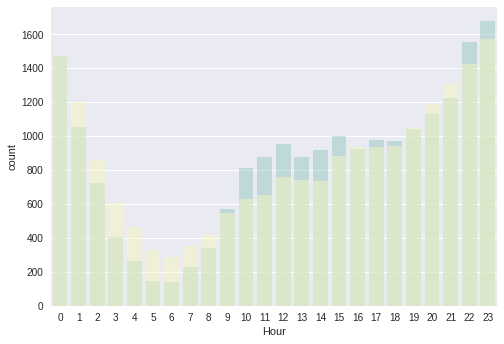

In [ ]:
Stat_Time('Hour', doTest=True)

----次數分配表----
     無憂鬱傾向  有憂鬱傾向
Mon   2926   3110
Tue   3011   3014
Wed   3005   2937
Thu   2900   2912
Fri   2906   2772
Sat   2663   2694
Sun   2869   2841 

----Chi-square test----
chi-square=9.89, df=6, p=0.13
H0 is accepted
Cramer's V=0.02




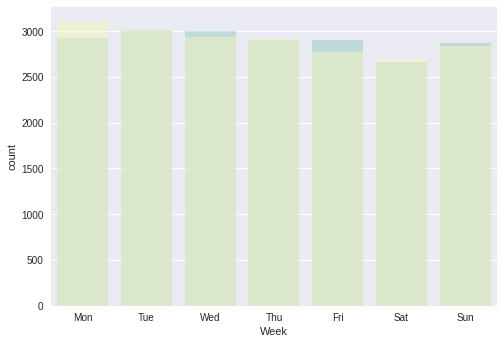

In [ ]:
#星期一為0，星期天為6
label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
Stat_Time('Week', label, doTest=True)

----次數分配表----
        無憂鬱傾向  有憂鬱傾向
Winter   3776   5154
Spring   4109   4983
Summer   6435   5036
Autumn   5960   5107 

----Chi-square test----
chi-square=533.02, df=3, p=0.00
H0 is rejected
Cramer's V=0.11




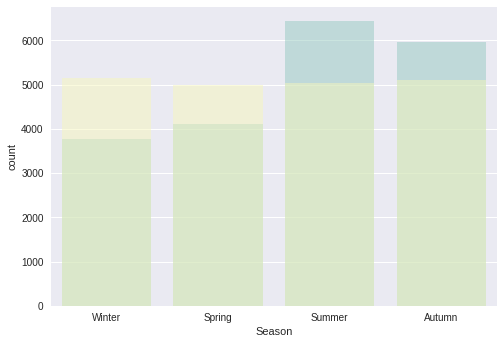

In [ ]:
#[1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 1]
label=['Winter', 'Spring', 'Summer', 'Autumn']
Stat_Time('Season', label, doTest=True)

----次數分配表----
         無憂鬱傾向  有憂鬱傾向
(0,6]     2731   3748
(6,12]    3787   3354
(12,18]   5666   5166
(18,0]    8096   8012 

----Chi-square test----
chi-square=209.41, df=3, p=0.00
H0 is rejected
Cramer's V=0.07




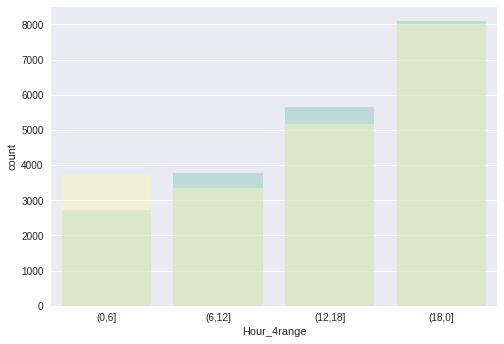

In [ ]:
label=['(0,6]', '(6,12]', '(12,18]', '(18,0]']
Stat_Time('Hour_4range', label, doTest=True)

----次數分配表----
       無憂鬱傾向  有憂鬱傾向
Month              
1       1279   1902
2        752   1556
3        759   1614
4       1109   1537
5       2241   1832
6       2276   1632
7       2038   1641
8       2121   1763
9       2056   1683
10      1995   1769
11      1909   1655
12      1745   1696 

----Chi-square test----
chi-square=1071.99, df=11, p=0.00
H0 is rejected
Cramer's V=0.16




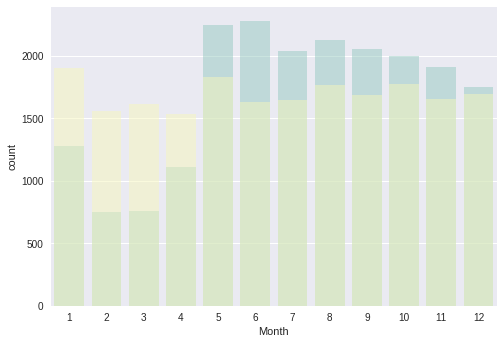

In [ ]:
Stat_Time('Month', doTest=True)

In [ ]:
def Midnight(a):

  if a==1:
    b=1
  else:
    b=0

  return b

In [ ]:
df['Midnight'] = df['Hour_4range'].apply(Midnight)

In [ ]:
df['Midnight'].isna().value_counts()

False    40560
Name: Midnight, dtype: int64

----次數分配表----
              無憂鬱傾向  有憂鬱傾向
Not Midnight  17549  16532
Midnight       2731   3748 

----Chi-square test----
chi-square=189.61, df=1, p=0.00
H0 is rejected
Cramer's V=0.07




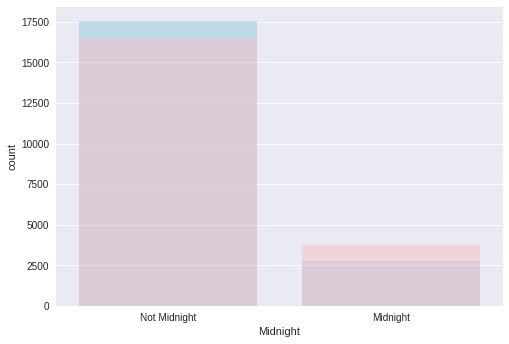

In [ ]:
label = ['Not Midnight', 'Midnight']
Stat_Time('Midnight', label, doTest=True)

#詞性

In [ ]:
import math
import pingouin as pg
from scipy import stats
import researchpy as ry
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.style.use('seaborn')
myfont=FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

In [ ]:
def stat(myname, mylabel):

  #刪除極端值:z分數超過3個標準差
  df_ND=df[df['Depressive']==0][(np.abs(stats.zscore(df[df['Depressive']==0][myname]))<3)]
  df_D=df[df['Depressive']==1][(np.abs(stats.zscore(df[df['Depressive']==1][myname]))<3)]
  df_temp=pd.concat([df_ND, df_D])

  print('----描述統計----')
  print('無憂鬱傾向')
  print(df_ND[myname].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .995]))
  print('\n')
  #print(df_ND[myname].value_counts(bins=[-1, 0, df_ND[myname].quantile(.95), df_ND[myname].max()]).sort_index())
  print('有憂鬱傾向')
  print(df_D[myname].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .995]))
  #print(df_D[myname].value_counts(bins=[-1, 0, df_D[myname].quantile(.95), df_D[myname].max()]).sort_index())
  print('\n')

  print('----統計結果----')
  print(mylabel)
  alpha = 0.05

  #check for equal variances
  stat, p = stats.levene(df_ND[myname], df_D[myname])
  print('Levene\'s F=%.2f, p=%.3f' % (stat, p))
  if p < alpha:
    flag=False
    print('variances is not equal.')
  else:
    flag=True
    print('variances is equal.')
  
  #t-test
  stat, p = stats.ttest_ind(df_ND[myname], df_D[myname], equal_var=flag)
  if flag==True:
    dof=df_ND[myname].count()+df_D[myname].count()-2
  else:
    dof=(df_ND.var()[myname]/df_ND[myname].count() + df_D.var()[myname]/df_D[myname].count())**2 / ((df_ND.var()[myname]/df_ND[myname].count())**2 / (df_ND[myname].count()-1) + (df_D.var()[myname]/df_D[myname].count())**2 / (df_D[myname].count()-1))
  
  print('\nStatistics=%.2f, p=%.3f, dof=%d' % (stat, p, dof))

  # interpret
  if p > alpha:
    print('Same distributions (fail to reject H0)')
  else:
    print('Different distributions (reject H0)')
  
  #cohen'd
  d=pg.compute_effsize(df_ND[myname], df_D[myname], eftype='cohen')
  print('cohen\'d=%.2f\n' %d)

  des, res=ry.ttest(df_ND[myname], df_D[myname], equal_variances=flag)
  print(res)
  print('\n')

  print('----圖表----')
  fig, ax=plt.subplots(1, 1)
  fig.suptitle(mylabel, fontproperties=myfont)
  sns.boxplot(x='Depressive', y=myname, data=df_temp, palette=["skyblue", "lightpink"])
  ax.set_xticklabels(labels=['無憂鬱傾向', '有憂鬱傾向'], fontproperties=myfont)
  ax.set(xlabel=None, ylabel=None)
  
  

----描述統計----
無憂鬱傾向
count    19834.000000
mean         0.097963
std          0.297272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          1.000000
99%          1.000000
99.5%        1.000000
max          1.000000
Name: A, dtype: float64


有憂鬱傾向
count    19807.000000
mean         0.223153
std          0.497985
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          1.000000
90%          1.000000
95%          1.000000
99%          2.000000
99.5%        2.000000
max          2.000000
Name: A, dtype: float64


----統計結果----
形容詞
Levene's F=923.83, p=0.000
variances is not equal.

Statistics=-30.38, p=0.000, dof=32322
Different distributions (reject H0)
cohen'd=-0.31

              Welch's t-test     results
0      Difference (A - A) =      -0.1252
1      Degrees of freedom =   32324.2178
2                       t 

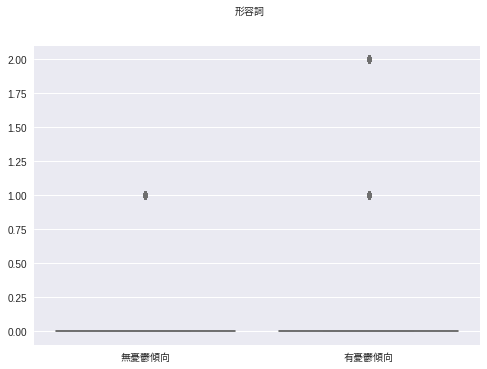

In [ ]:
stat(myname='A', mylabel='形容詞')

----描述統計----
無憂鬱傾向
count    19995.000000
mean        17.250863
std         13.507321
min          0.000000
25%          9.000000
50%         13.000000
75%         20.000000
80%         23.000000
85%         27.000000
90%         33.000000
95%         45.000000
99%         74.000000
99.5%       82.000000
max         93.000000
Name: V, dtype: float64


有憂鬱傾向
count    19864.000000
mean        37.034484
std         31.242515
min          0.000000
25%         15.000000
50%         27.000000
75%         49.000000
80%         56.000000
85%         66.000000
90%         80.000000
95%        105.000000
99%        147.370000
99.5%      159.000000
max        173.000000
Name: V, dtype: float64


----統計結果----
動詞
Levene's F=4947.99, p=0.000
variances is not equal.

Statistics=-81.96, p=0.000, dof=26999
Different distributions (reject H0)
cohen'd=-0.82

              Welch's t-test     results
0      Difference (V - V) =     -19.7836
1      Degrees of freedom =   27000.5083
2                       t 

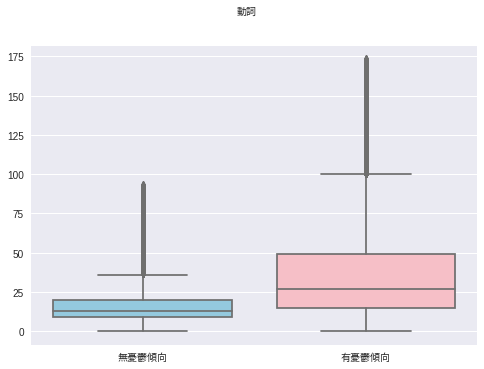

In [ ]:
stat(myname='V', mylabel='動詞')

----描述統計----
無憂鬱傾向
count    20021.000000
mean        12.382698
std          9.709141
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
80%         17.000000
85%         20.000000
90%         24.000000
95%         32.000000
99%         51.000000
99.5%       57.000000
max         66.000000
Name: N, dtype: float64


有憂鬱傾向
count    19899.000000
mean        24.054877
std         22.104422
min          0.000000
25%          9.000000
50%         17.000000
75%         32.000000
80%         37.000000
85%         44.000000
90%         54.000000
95%         71.000000
99%        107.000000
99.5%      115.000000
max        125.000000
Name: N, dtype: float64


----統計結果----
名詞
Levene's F=4090.07, p=0.000
variances is not equal.

Statistics=-68.23, p=0.000, dof=27264
Different distributions (reject H0)
cohen'd=-0.68

              Welch's t-test     results
0      Difference (N - N) =     -11.6722
1      Degrees of freedom =   27265.1038
2                       t 

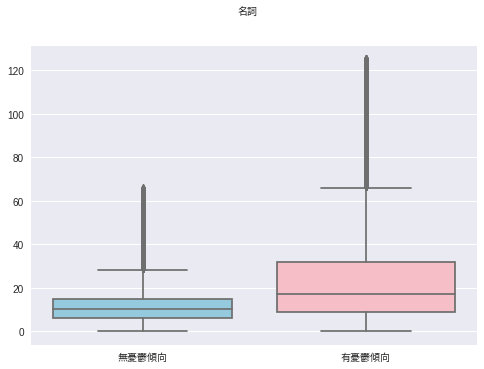

In [ ]:
stat(myname='N', mylabel='名詞')

----描述統計----
無憂鬱傾向
count    20003.000000
mean         1.700095
std          2.057467
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
80%          3.000000
85%          3.000000
90%          4.000000
95%          6.000000
99%         10.000000
99.5%       11.000000
max         12.000000
Name: C, dtype: float64


有憂鬱傾向
count    19909.000000
mean         4.349189
std          4.835793
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
80%          7.000000
85%          9.000000
90%         11.000000
95%         15.000000
99%         22.000000
99.5%       24.000000
max         26.000000
Name: C, dtype: float64


----統計結果----
連接詞
Levene's F=4343.09, p=0.000
variances is not equal.

Statistics=-71.15, p=0.000, dof=26860
Different distributions (reject H0)
cohen'd=-0.71

              Welch's t-test     results
0      Difference (C - C) =      -2.6491
1      Degrees of freedom =   26860.8042
2                       t

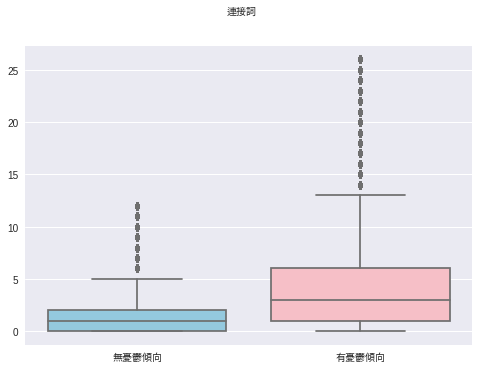

In [ ]:
stat(myname='C', mylabel='連接詞')

----描述統計----
無憂鬱傾向
count    20023.000000
mean        12.572641
std         10.694615
min          0.000000
25%          6.000000
50%          9.000000
75%         15.000000
80%         17.000000
85%         20.000000
90%         25.000000
95%         34.000000
99%         57.000000
99.5%       63.000000
max         72.000000
Name: D, dtype: float64


有憂鬱傾向
count    19871.000000
mean        25.865784
std         22.362283
min          0.000000
25%         10.000000
50%         19.000000
75%         35.000000
80%         40.000000
85%         47.000000
90%         57.000000
95%         74.000000
99%        105.000000
99.5%      112.000000
max        121.000000
Name: D, dtype: float64


----統計結果----
副詞
Levene's F=4348.72, p=0.000
variances is not equal.

Statistics=-75.65, p=0.000, dof=28458
Different distributions (reject H0)
cohen'd=-0.76

              Welch's t-test     results
0      Difference (D - D) =     -13.2931
1      Degrees of freedom =   28459.7022
2                       t 

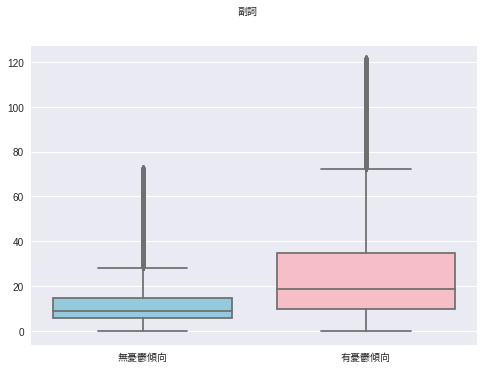

In [ ]:
stat(myname='D', mylabel='副詞')

----描述統計----
無憂鬱傾向
count    19884.000000
mean         0.081271
std          0.273258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
90%          0.000000
95%          1.000000
99%          1.000000
99.5%        1.000000
max          1.000000
Name: I, dtype: float64


有憂鬱傾向
count    20098.00000
mean         0.12250
std          0.37621
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
80%          0.00000
85%          0.00000
90%          1.00000
95%          1.00000
99%          2.00000
99.5%        2.00000
max          2.00000
Name: I, dtype: float64


----統計結果----
感嘆詞
Levene's F=156.90, p=0.000
variances is not equal.

Statistics=-12.55, p=0.000, dof=36697
Different distributions (reject H0)
cohen'd=-0.13

              Welch's t-test     results
0      Difference (I - I) =      -0.0412
1      Degrees of freedom =   36699.4080
2                       t =     -12.5469

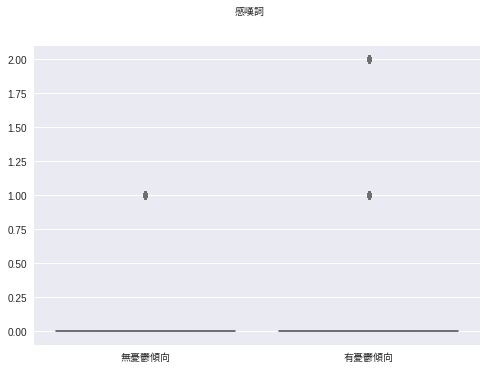

In [ ]:
stat(myname='I', mylabel='感嘆詞')

----描述統計----
無憂鬱傾向
count    20025.000000
mean         2.115506
std          2.445958
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
80%          3.000000
85%          4.000000
90%          5.000000
95%          7.000000
99%         12.000000
99.5%       13.000000
max         15.000000
Name: P, dtype: float64


有憂鬱傾向
count    19841.000000
mean         4.634545
std          4.951351
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
80%          7.000000
85%          9.000000
90%         11.000000
95%         15.000000
99%         23.000000
99.5%       24.000000
max         26.000000
Name: P, dtype: float64


----統計結果----
介詞
Levene's F=3085.61, p=0.000
variances is not equal.

Statistics=-64.31, p=0.000, dof=28919
Different distributions (reject H0)
cohen'd=-0.65

              Welch's t-test     results
0      Difference (P - P) =      -2.5190
1      Degrees of freedom =   28919.9593
2                       t 

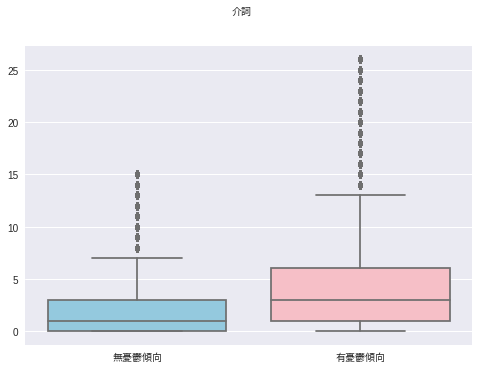

In [ ]:
stat(myname='P', mylabel='介詞')

----描述統計----
無憂鬱傾向
count    20013.000000
mean         1.281967
std          1.399328
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
80%          2.000000
85%          3.000000
90%          3.000000
95%          4.000000
99%          6.000000
99.5%        7.000000
max          7.000000
Name: T, dtype: float64


有憂鬱傾向
count    19933.000000
mean         1.804244
std          2.034966
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
80%          3.000000
85%          4.000000
90%          5.000000
95%          6.000000
99%          9.000000
99.5%       10.000000
max         10.000000
Name: T, dtype: float64


----統計結果----
語助詞
Levene's F=1113.90, p=0.000
variances is not equal.

Statistics=-29.88, p=0.000, dof=35323
Different distributions (reject H0)
cohen'd=-0.30

              Welch's t-test     results
0      Difference (T - T) =      -0.5223
1      Degrees of freedom =   35325.2956
2                       t

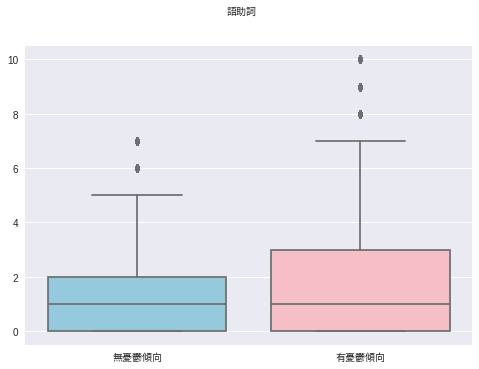

In [ ]:
stat(myname='T', mylabel='語助詞')

#發文字數

In [ ]:
import math
import pingouin as pg
from scipy import stats
import researchpy as ry
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.style.use('seaborn')
myfont=FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

In [ ]:
def stat(myname, mylabel):

  #刪除極端值:z分數超過3個標準差
  df_ND=df[df['Depressive']==0][(np.abs(stats.zscore(df[df['Depressive']==0][myname]))<3)]
  df_D=df[df['Depressive']==1][(np.abs(stats.zscore(df[df['Depressive']==1][myname]))<3)]
  df_temp=pd.concat([df_ND, df_D])

  print('----描述統計----')
  print('無憂鬱傾向')
  print(df_ND[myname].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .995]))
  print('\n')
  #print(df_ND[myname].value_counts(bins=[-1, 0, df_ND[myname].quantile(.95), df_ND[myname].max()]).sort_index())
  print('有憂鬱傾向')
  print(df_D[myname].describe(percentiles=[.25, .5, .75, .8, .85, .9, .95, .99, .995]))
  #print(df_D[myname].value_counts(bins=[-1, 0, df_D[myname].quantile(.95), df_D[myname].max()]).sort_index())
  print('\n')

  print('----統計結果----')
  print(mylabel)
  alpha = 0.05

  #check for equal variances
  stat, p = stats.levene(df_ND[myname], df_D[myname])
  print('Levene\'s F=%.2f, p=%.3f' % (stat, p))
  if p < alpha:
    flag=False
    print('variances is not equal.')
  else:
    flag=True
    print('variances is equal.')
  
  #t-test
  stat, p = stats.ttest_ind(df_ND[myname], df_D[myname], equal_var=flag)
  if flag==True:
    dof=df_ND[myname].count()+df_D[myname].count()-2
  else:
    dof=(df_ND.var()[myname]/df_ND[myname].count() + df_D.var()[myname]/df_D[myname].count())**2 / ((df_ND.var()[myname]/df_ND[myname].count())**2 / (df_ND[myname].count()-1) + (df_D.var()[myname]/df_D[myname].count())**2 / (df_D[myname].count()-1))
  
  print('\nStatistics=%.2f, p=%.3f, dof=%d' % (stat, p, dof))

  # interpret
  if p > alpha:
    print('Same distributions (fail to reject H0)')
  else:
    print('Different distributions (reject H0)')
  
  #cohen'd
  d=pg.compute_effsize(df_ND[myname], df_D[myname], eftype='cohen')
  print('cohen\'d=%.2f\n' %d)

  des, res=ry.ttest(df_ND[myname], df_D[myname], equal_variances=flag)
  print(res)
  print('\n')

  print('----圖表----')
  fig, ax=plt.subplots(1, 1)
  fig.suptitle(mylabel, fontproperties=myfont)
  sns.boxplot(x='Depressive', y=myname, data=df_temp, palette="Set3")
  ax.set_xticklabels(labels=['無憂鬱傾向', '有憂鬱傾向'], fontproperties=myfont)
  ax.set(xlabel=None, ylabel=None)

----描述統計----
無憂鬱傾向
count    19995.000000
mean       136.272518
std         97.895460
min         30.000000
25%         75.000000
50%        106.000000
75%        160.000000
80%        180.000000
85%        208.000000
90%        255.000000
95%        340.000000
99%        546.000000
99.5%      607.000000
max        690.000000
Name: WordCount, dtype: float64


有憂鬱傾向
count    19872.000000
mean       271.046850
std        226.372689
min         30.000000
25%        114.000000
50%        196.000000
75%        349.000000
80%        405.000000
85%        476.000000
90%        574.000000
95%        758.000000
99%       1105.870000
99.5%     1178.000000
max       1278.000000
Name: WordCount, dtype: float64


----統計結果----
發文字數
Levene's F=4475.85, p=0.000
variances is not equal.

Statistics=-77.07, p=0.000, dof=27016
Different distributions (reject H0)
cohen'd=-0.77

                          Welch's t-test     results
0  Difference (WordCount - WordCount) =    -134.7743
1                  Degree

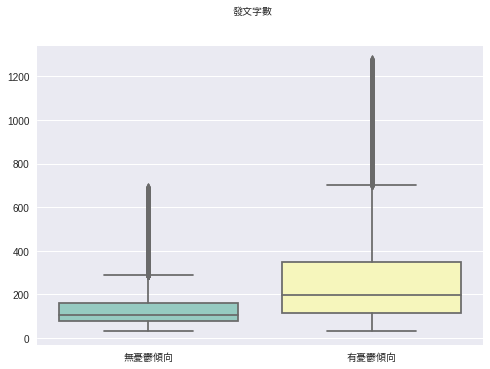

In [ ]:
stat(myname='WordCount', mylabel='發文字數')